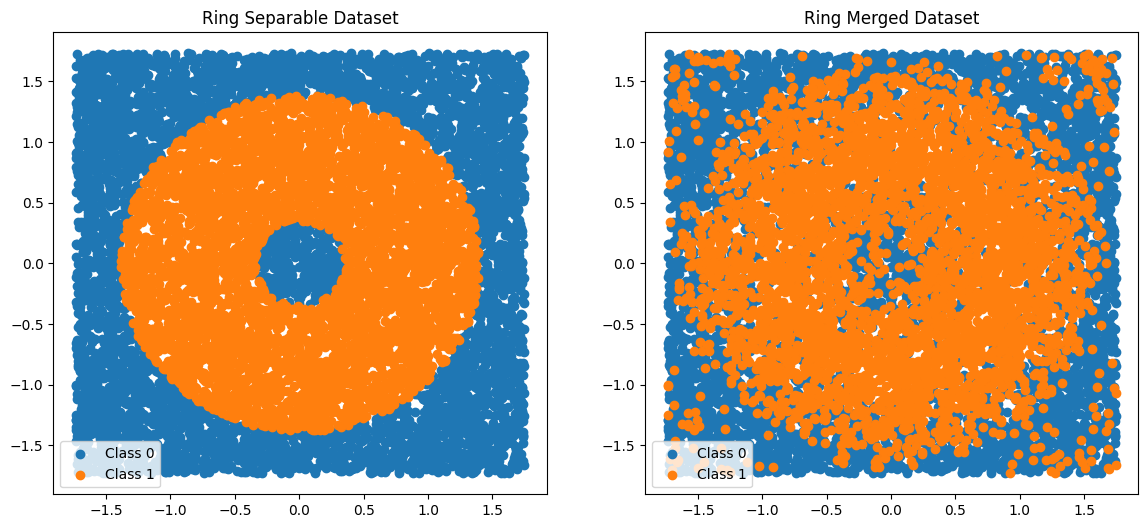

In [2]:
# Ring dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load ring datasets with updated sep parameter
ring_separable = pd.read_csv(r'C:/Users/Kuldeep/A2-ring-separable.txt', sep=r'\s+', header=None, names=['x1', 'x2', 'class'])
ring_merged = pd.read_csv(r'C:/Users/Kuldeep/A2-ring-merged.txt', sep=r'\s+', header=None, names=['x1', 'x2', 'class'])
ring_test = pd.read_csv(r'C:/Users/Kuldeep/A2-ring-test.txt', sep=r'\s+', header=None, names=['x1', 'x2', 'class'])

# Standardize the features
scaler = StandardScaler()
ring_separable[['x1', 'x2']] = scaler.fit_transform(ring_separable[['x1', 'x2']])
ring_merged[['x1', 'x2']] = scaler.fit_transform(ring_merged[['x1', 'x2']])
ring_test[['x1', 'x2']] = scaler.fit_transform(ring_test[['x1', 'x2']])

# Plotting ring datasets
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Separable dataset
ax[0].scatter(ring_separable[ring_separable['class'] == 0]['x1'], ring_separable[ring_separable['class'] == 0]['x2'], label='Class 0')
ax[0].scatter(ring_separable[ring_separable['class'] == 1]['x1'], ring_separable[ring_separable['class'] == 1]['x2'], label='Class 1')
ax[0].set_title('Ring Separable Dataset')
ax[0].legend()

# Merged dataset
ax[1].scatter(ring_merged[ring_merged['class'] == 0]['x1'], ring_merged[ring_merged['class'] == 0]['x2'], label='Class 0')
ax[1].scatter(ring_merged[ring_merged['class'] == 1]['x1'], ring_merged[ring_merged['class'] == 1]['x2'], label='Class 1')
ax[1].set_title('Ring Merged Dataset')
ax[1].legend()

plt.show()


In [3]:
# Bank dataset 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load bank dataset
bank_data = pd.read_csv('C:/Users/Kuldeep/bank-additional-full.csv', sep=';')

# Handle missing values
bank_data.replace('unknown', pd.NA, inplace=True)
bank_data.dropna(inplace=True)

# Identify categorical and numerical columns
categorical_columns = bank_data.select_dtypes(include=['object']).columns
numerical_columns = bank_data.select_dtypes(exclude=['object']).columns

# Convert categorical variables to numerical
bank_data = pd.get_dummies(bank_data, columns=categorical_columns, drop_first=True)

# Split into features and target
X = bank_data.drop('y_yes', axis=1)  # Adjust 'y_yes' if needed based on your column names after one-hot encoding
y = bank_data['y_yes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize only the numerical features to the range [0, 1]
scaler = MinMaxScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Convert only the binary columns to int (0/1)
binary_columns = X_train.columns.difference(numerical_columns)
X_train[binary_columns] = X_train[binary_columns].astype(int)
X_test[binary_columns] = X_test[binary_columns].astype(int)

# Reset index for consistent display
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Output the first few rows of the processed training data
print(X_train.head())


        age  duration  campaign  pdays  previous  emp.var.rate  \
0  0.243590  0.033341   0.00000    1.0  0.000000      1.000000   
1  0.269231  0.201953   0.00000    1.0  0.000000      1.000000   
2  0.435897  0.010241   0.02381    1.0  0.142857      0.333333   
3  0.487179  0.031912   0.00000    1.0  0.000000      1.000000   
4  0.333333  0.054775   0.00000    1.0  0.000000      0.333333   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_may  \
0        0.669135       0.338912   0.981410     1.000000  ...          0   
1        0.484412       0.615063   0.982090     1.000000  ...          0   
2        0.269680       0.192469   0.157107     0.512287  ...          1   
3        0.669135       0.338912   0.981183     1.000000  ...          0   
4        0.340608       0.154812   0.188619     0.512287  ...          0   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0          0          0          0                0                1   
1 

In [4]:
# Diabetes dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
file_path = 'diabetes.csv'  # Update this path if necessary
data = pd.read_csv(file_path)

# Replace zero values with NaN for specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Impute missing values with the mean of the column
data.fillna(data.mean(), inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of columns to normalize (excluding the target column 'Outcome')
columns_to_normalize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fit and transform the data
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the normalized data (optional, for checking the normalization)
print("First few rows of the normalized data:")
print(data.head())

# Verify that the 'Outcome' column contains only 0 and 1
unique_values = data['Outcome'].unique()
print("Unique values in 'Outcome' column:", unique_values)

# Shuffle the dataset and split into features and target
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Features and target
X = data_shuffled.drop(columns=['Outcome'])
y = data_shuffled['Outcome']

# Split the data: 80% for training and validation, 20% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Show the shape of the datasets to ensure correct splitting
print("Training and validation set shape:", X_train_val.shape)
print("Test set shape:", X_test.shape)


First few rows of the normalized data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  
Unique values in 'Outcome' column: [1 0]
Training and validation set shape: (614, 8)
Test set shape: (154, 8)


In [5]:
# Part 2: Part 2.1:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load diabetes dataset
diabetes_data = pd.read_csv('C:/Users/Kuldeep/diabetes.csv')

# Check for missing values and drop if any
diabetes_data.dropna(inplace=True)

# Split into features and target
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define function to perform cross-validation and parameter tuning
def perform_grid_search(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_
    test_score = accuracy_score(y_test, grid_search.predict(X_test))
    
    # Calculate classification error
    best_cv_error = 1 - best_cv_score
    test_error = 1 - test_score
    
    return best_params, best_cv_score, best_cv_error, test_score, test_error

# SVM with cross-validation
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
best_params_svm, best_cv_score_svm, best_cv_error_svm, svm_test_score, svm_test_error = perform_grid_search(SVC(), param_grid_svm, X_train, y_train, X_test, y_test)

# MLR with cross-validation
param_grid_mlr = {
    'C': [0.1, 1, 10]
}
best_params_mlr, best_cv_score_mlr, best_cv_error_mlr, mlr_test_score, mlr_test_error = perform_grid_search(LogisticRegression(max_iter=10000), param_grid_mlr, X_train, y_train, X_test, y_test)

# BP with cross-validation
param_grid_bp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}
best_params_bp, best_cv_score_bp, best_cv_error_bp, bp_test_score, bp_test_error = perform_grid_search(MLPClassifier(max_iter=10000), param_grid_bp, X_train, y_train, X_test, y_test)

# Summary of results
results = {
    'Model': ['SVM', 'MLR', 'BP'],
    'Best Parameters': [best_params_svm, best_params_mlr, best_params_bp],
    'CV Score': [best_cv_score_svm, best_cv_score_mlr, best_cv_score_bp],
    'CV Error': [best_cv_error_svm, best_cv_error_mlr, best_cv_error_bp],
    'Test Set Score': [svm_test_score, mlr_test_score, bp_test_score],
    'Test Set Error': [svm_test_error, mlr_test_error, bp_test_error]
}

results_df = pd.DataFrame(results)

pd.set_option('display.max_colwidth', None)

print(results_df)

  Model  \
0   SVM   
1   MLR   
2    BP   

                                                                                                        Best Parameters  \
0                                                                           {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}   
1                                                                                                             {'C': 10}   
2  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}   

   CV Score  CV Error  Test Set Score  Test Set Error  
0  0.765467  0.234533        0.727273        0.272727  
1  0.765507  0.234493        0.753247        0.246753  
2  0.737852  0.262148        0.727273        0.272727  


D:\New folder (2)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ring Separable SVM Classification Error: 2.36%
Ring Separable MLR Classification Error: 47.13%
Ring Separable BP Classification Error: 3.64%
Ring Merged SVM Classification Error: 4.08%
Ring Merged MLR Classification Error: 46.67%
Ring Merged BP Classification Error: 3.98%
Bank Marketing SVM Classification Error: 11.92%
Bank Marketing MLR Classification Error: 10.38%
Bank Marketing BP Classification Error: 11.05%
Diabetes SVM Classification Error: 27.27%
Diabetes MLR Classification Error: 24.68%
Diabetes BP Classification Error: 26.62%
Confusion Matrix - Ring Separable SVM
[[5108  225]
 [  11 4656]]
Confusion Matrix - Ring Separable MLR
[[5287   46]
 [4667    0]]
Confusion Matrix - Ring Separable BP
[[5022  311]
 [  53 4614]]
Confusion Matrix - Ring Merged SVM
[[4999  334]
 [  74 4593]]
Confusion Matrix - Ring Merged MLR
[[5333    0]
 [4667    0]]
Confusion Matrix - Ring Merged BP
[[5141  192]
 [ 206 4461]]
Confusion Matrix - Bank Marketing SVM
[[5210   94]
 [ 633  161]]
Confusion Matri

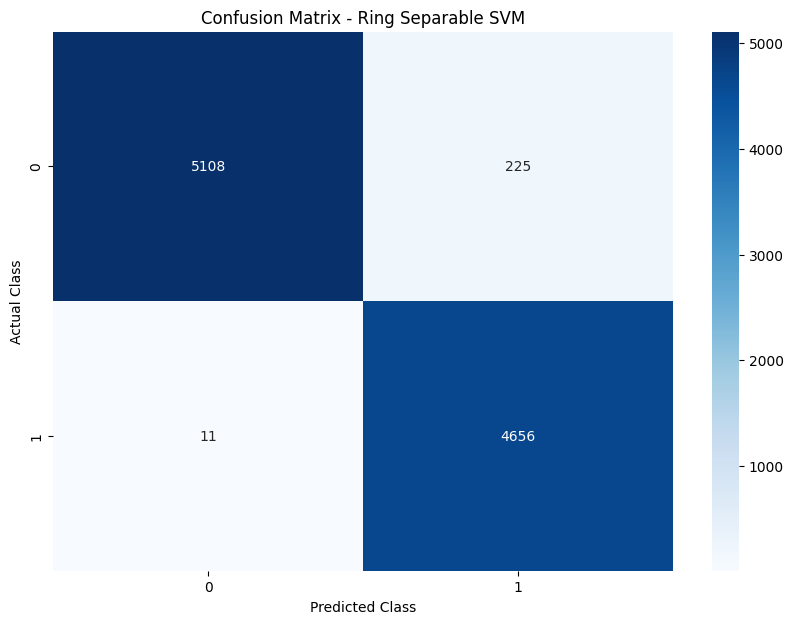

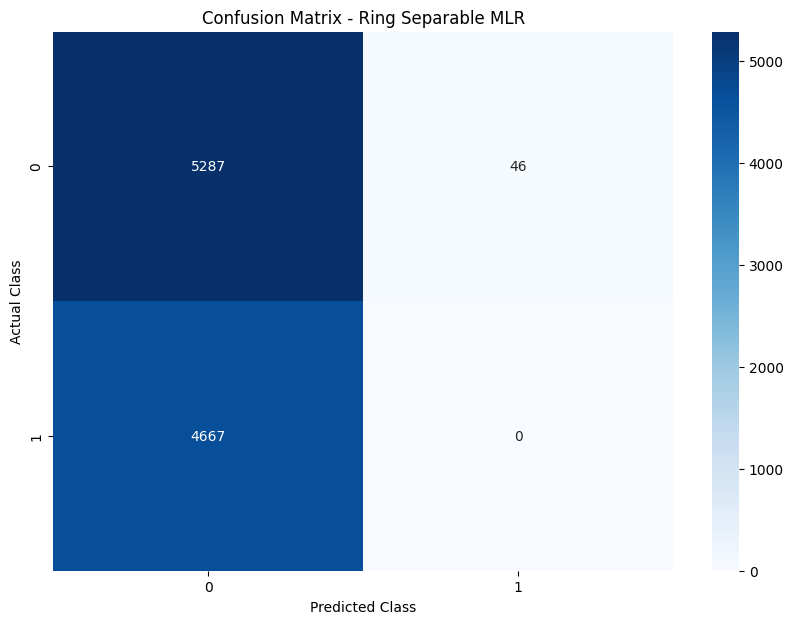

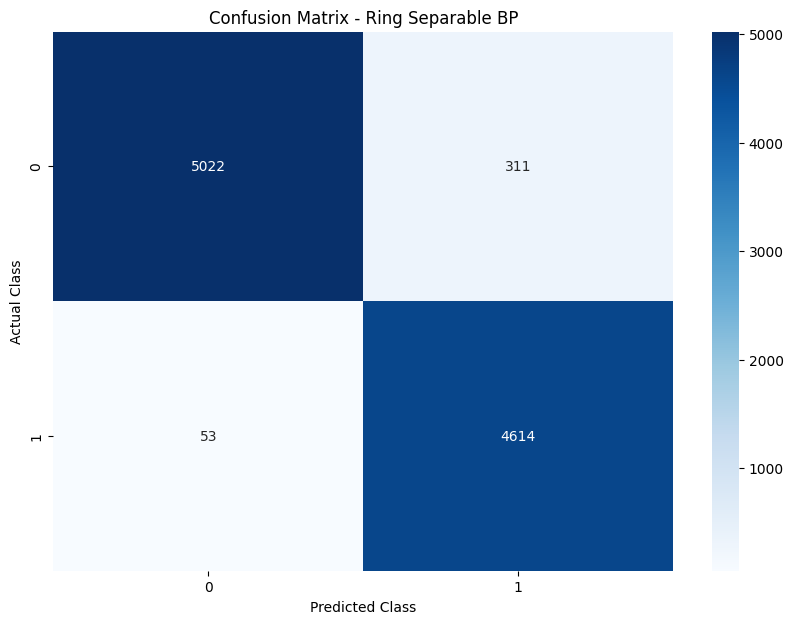

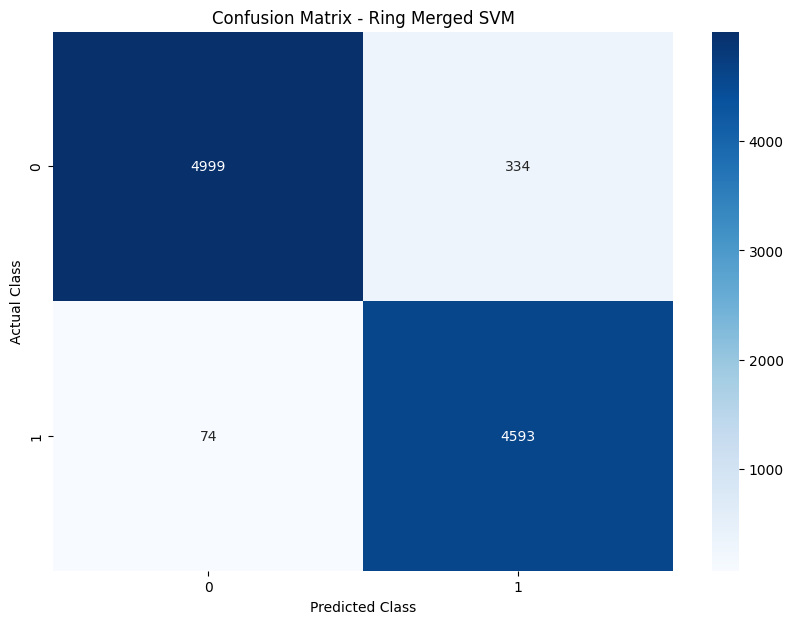

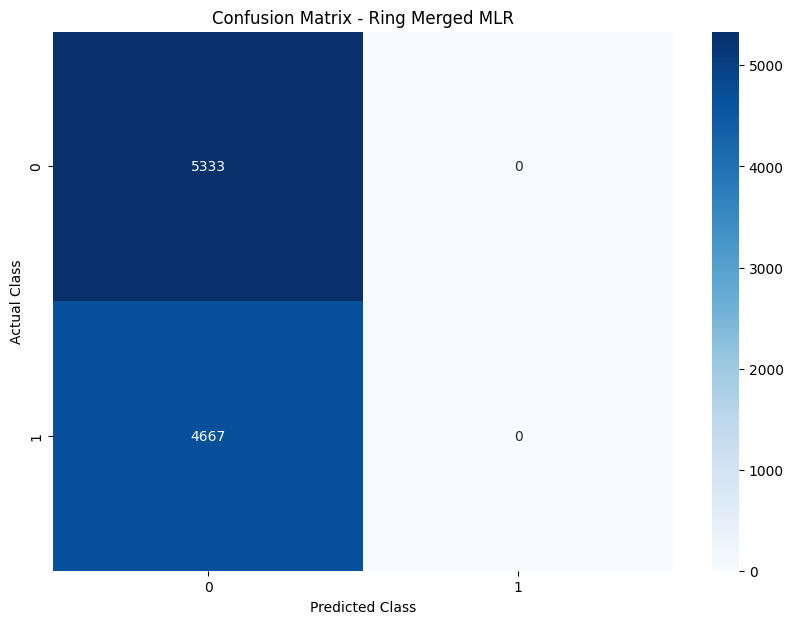

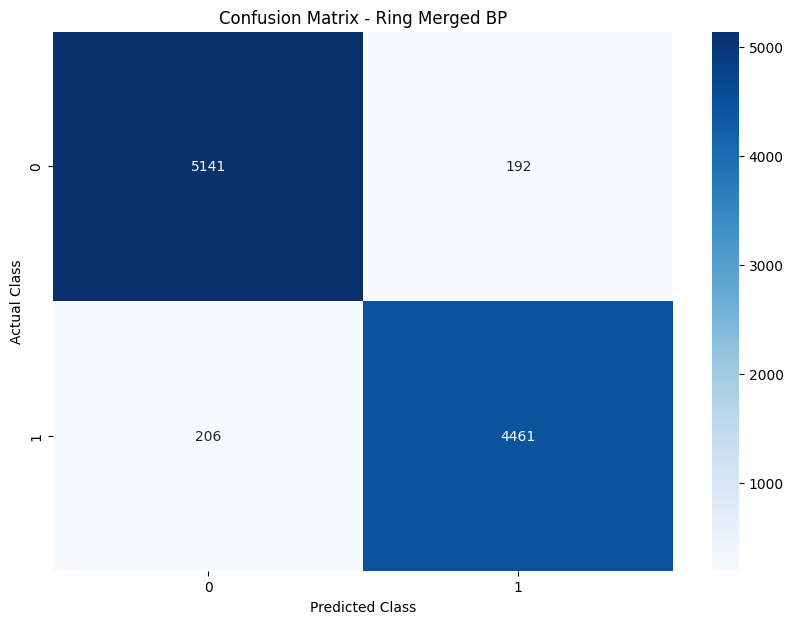

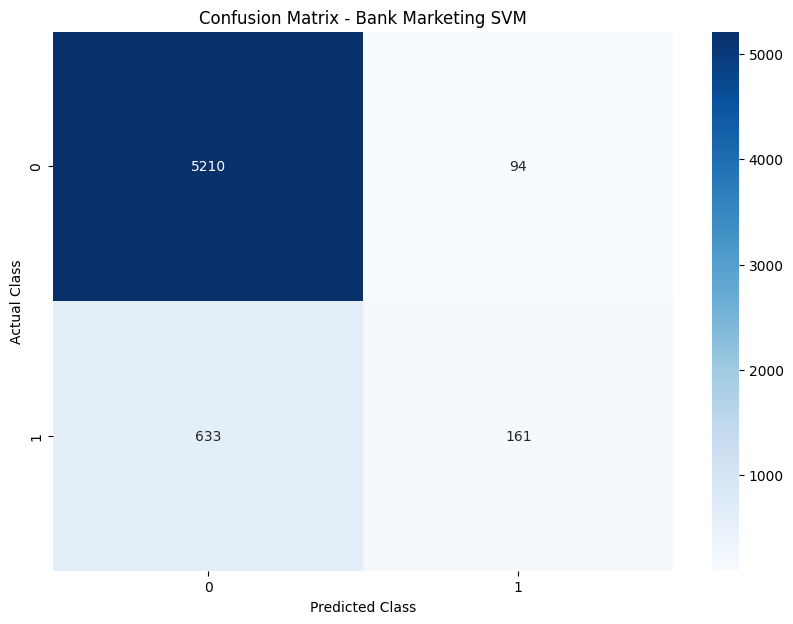

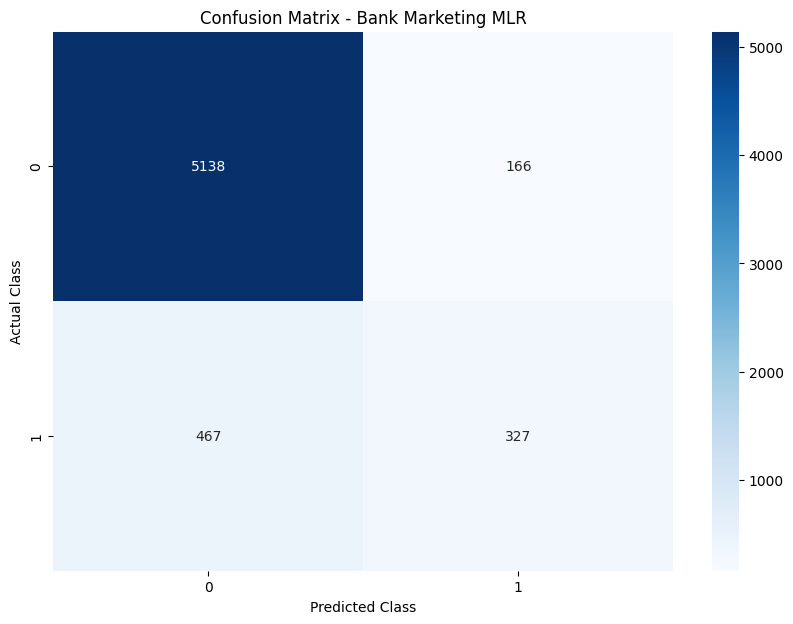

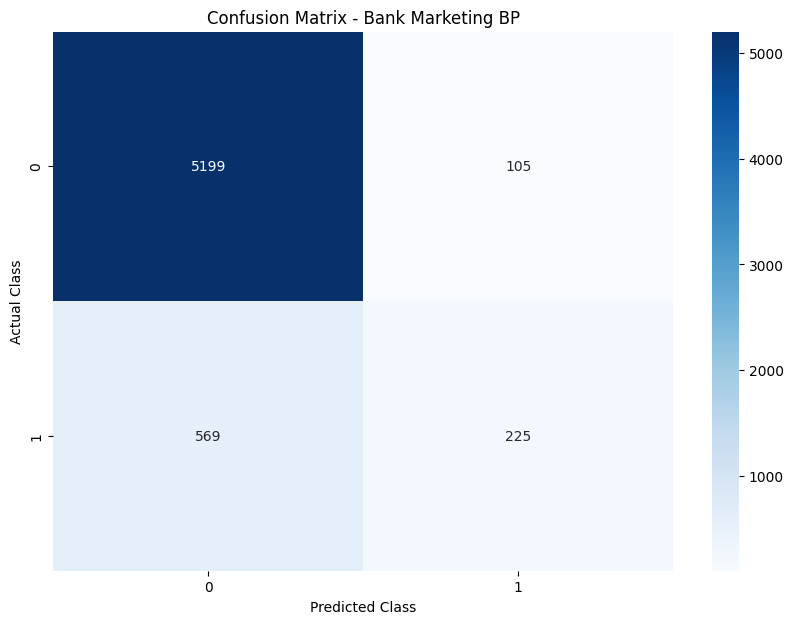

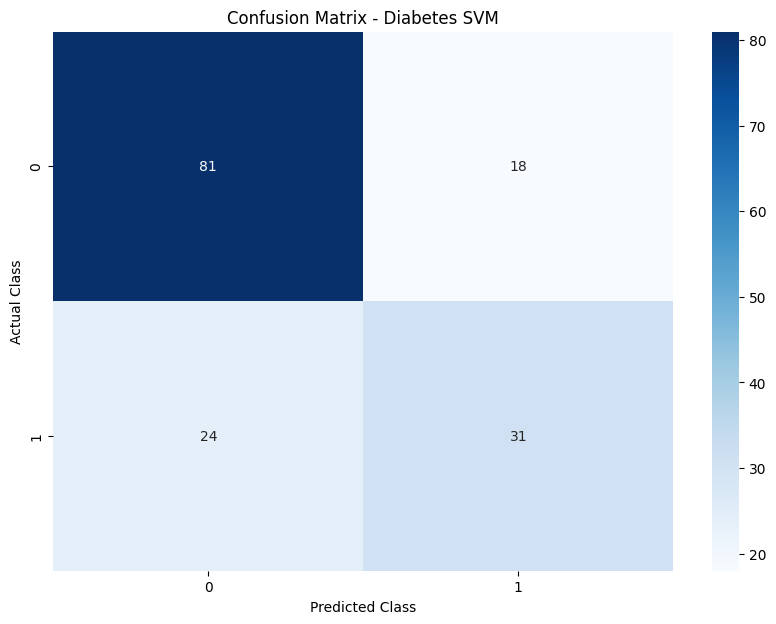

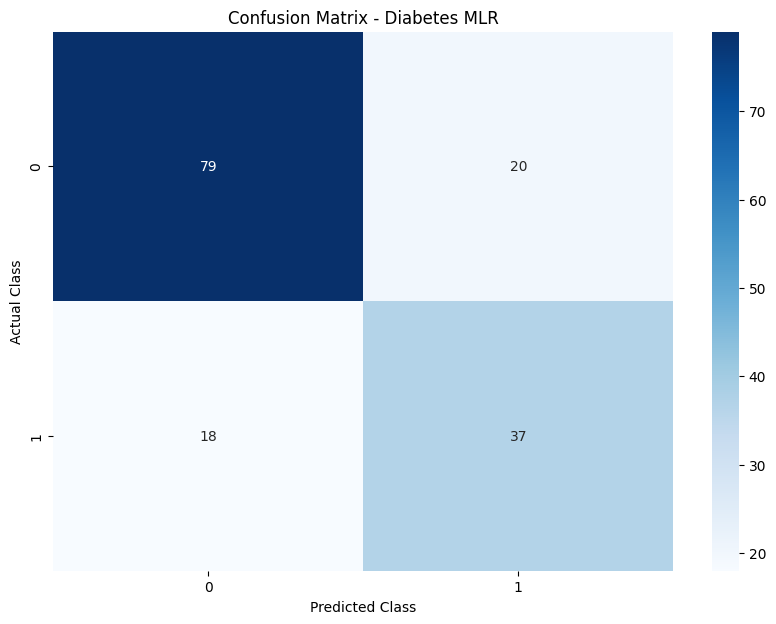

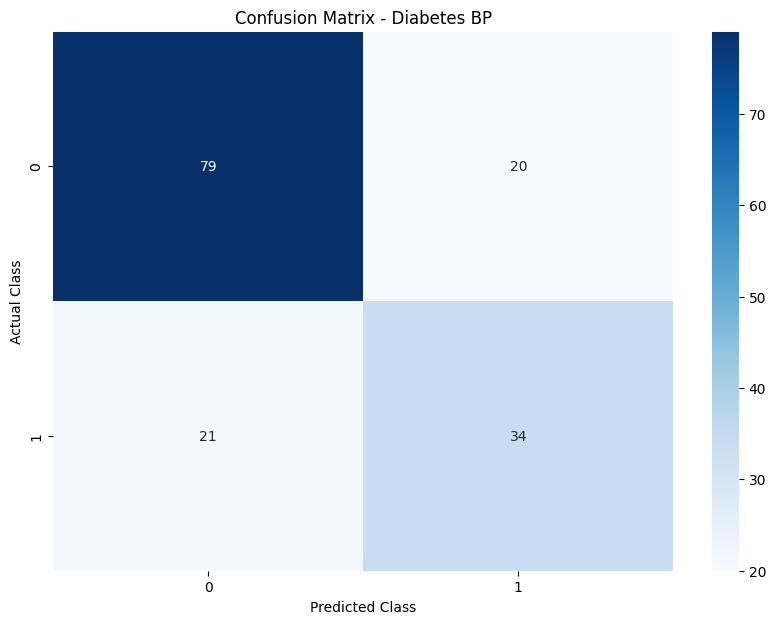

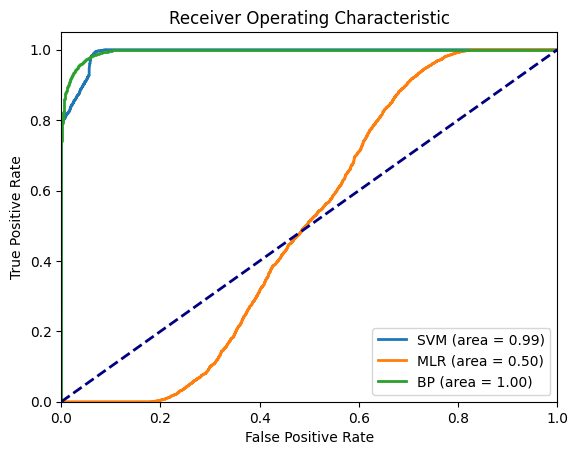

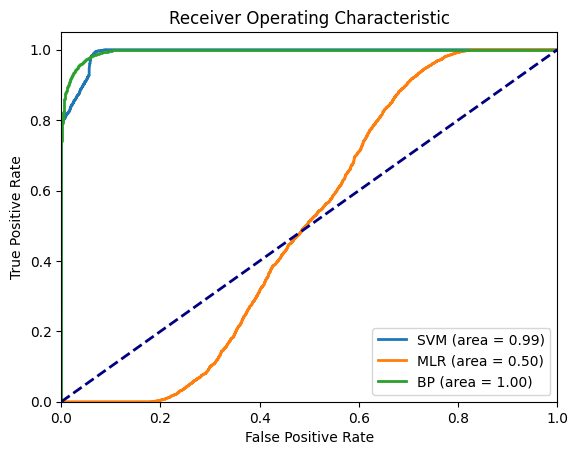

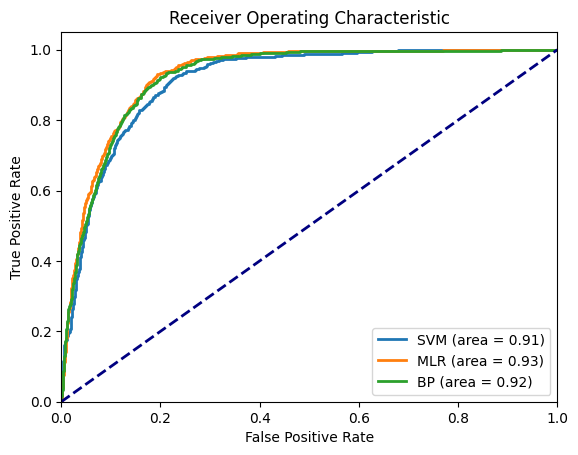

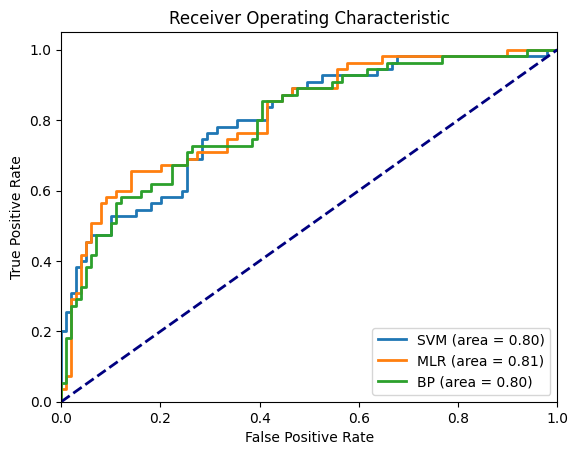

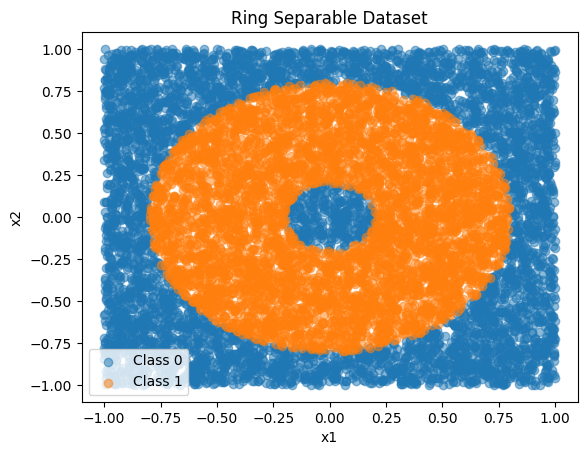

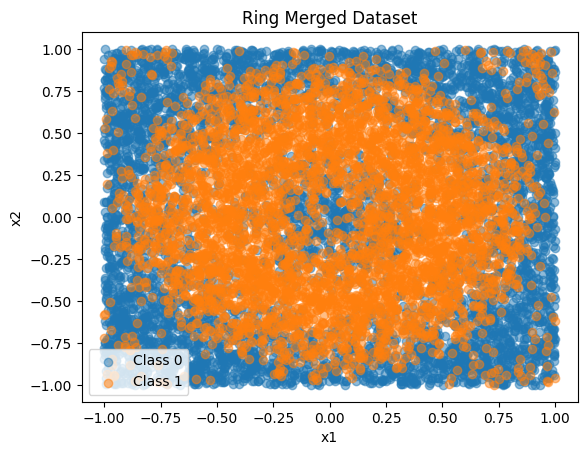

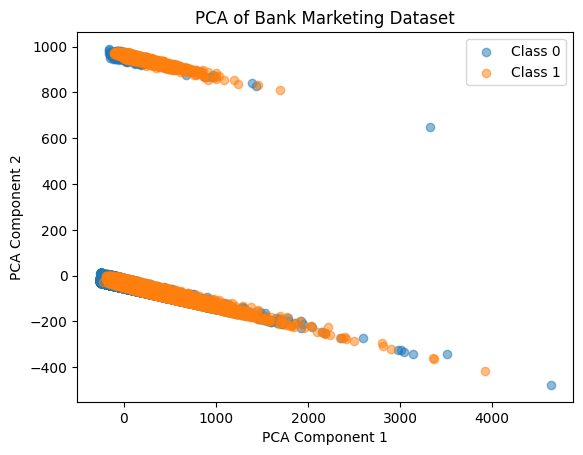

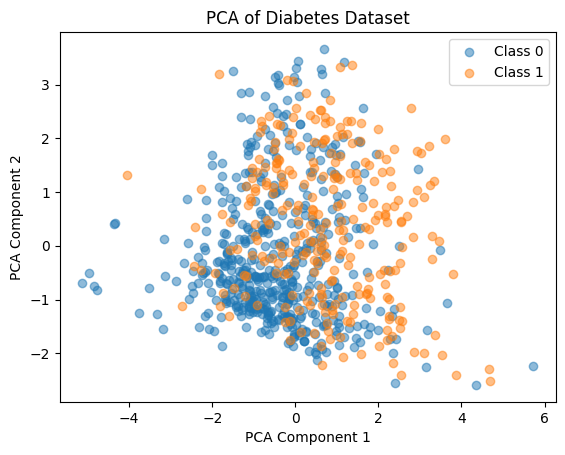

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Function to perform model fitting and evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    conf_matrix = confusion_matrix(y_test, y_pred)
    error = 100 * (conf_matrix[0, 1] + conf_matrix[1, 0]) / conf_matrix.sum()
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    return error, conf_matrix, fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curves(models, X_test, y_test):
    plt.figure()
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Use normalized data from previous cells
# These variables are already defined:
# X_train_ring_sep, y_train_ring_sep, X_test_ring, y_test_ring
# X_train_ring_mer, y_train_ring_mer
# X_train_bank, X_test_bank, y_train_bank, y_test_bank
# X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes

# Define models with best parameters from Part 2.1
svm_model_ring = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
mlr_model_ring = LogisticRegression(C=10, max_iter=5000)
bp_model_ring = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(50,), max_iter=10000)

svm_model_bank = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
mlr_model_bank = LogisticRegression(C=10, max_iter=5000)
bp_model_bank = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(50,), max_iter=10000)

svm_model_diabetes = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
mlr_model_diabetes = LogisticRegression(C=10, max_iter=5000)
bp_model_diabetes = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(50,), max_iter=10000)

# Evaluate on Ring Separable Dataset
error_svm_sep, conf_matrix_svm_sep, fpr_svm_sep, tpr_svm_sep, roc_auc_svm_sep = evaluate_model(svm_model_ring, X_train_ring_sep, y_train_ring_sep, X_test_ring, y_test_ring)
error_mlr_sep, conf_matrix_mlr_sep, fpr_mlr_sep, tpr_mlr_sep, roc_auc_mlr_sep = evaluate_model(mlr_model_ring, X_train_ring_sep, y_train_ring_sep, X_test_ring, y_test_ring)
error_bp_sep, conf_matrix_bp_sep, fpr_bp_sep, tpr_bp_sep, roc_auc_bp_sep = evaluate_model(bp_model_ring, X_train_ring_sep, y_train_ring_sep, X_test_ring, y_test_ring)

# Evaluate on Ring Merged Dataset
error_svm_mer, conf_matrix_svm_mer, fpr_svm_mer, tpr_svm_mer, roc_auc_svm_mer = evaluate_model(svm_model_ring, X_train_ring_mer, y_train_ring_mer, X_test_ring, y_test_ring)
error_mlr_mer, conf_matrix_mlr_mer, fpr_mlr_mer, tpr_mlr_mer, roc_auc_mlr_mer = evaluate_model(mlr_model_ring, X_train_ring_mer, y_train_ring_mer, X_test_ring, y_test_ring)
error_bp_mer, conf_matrix_bp_mer, fpr_bp_mer, tpr_bp_mer, roc_auc_bp_mer = evaluate_model(bp_model_ring, X_train_ring_mer, y_train_ring_mer, X_test_ring, y_test_ring)

# Evaluate on Bank Marketing Dataset
error_svm_bank, conf_matrix_svm_bank, fpr_svm_bank, tpr_svm_bank, roc_auc_svm_bank = evaluate_model(svm_model_bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)
error_mlr_bank, conf_matrix_mlr_bank, fpr_mlr_bank, tpr_mlr_bank, roc_auc_mlr_bank = evaluate_model(mlr_model_bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)
error_bp_bank, conf_matrix_bp_bank, fpr_bp_bank, tpr_bp_bank, roc_auc_bp_bank = evaluate_model(bp_model_bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)

# Evaluate on Diabetes Dataset
error_svm_diabetes, conf_matrix_svm_diabetes, fpr_svm_diabetes, tpr_svm_diabetes, roc_auc_svm_diabetes = evaluate_model(svm_model_diabetes, X_train_diabetes, y_train_diabetes, X_test_diabetes, y_test_diabetes)
error_mlr_diabetes, conf_matrix_mlr_diabetes, fpr_mlr_diabetes, tpr_mlr_diabetes, roc_auc_mlr_diabetes = evaluate_model(mlr_model_diabetes, X_train_diabetes, y_train_diabetes, X_test_diabetes, y_test_diabetes)
error_bp_diabetes, conf_matrix_bp_diabetes, fpr_bp_diabetes, tpr_bp_diabetes, roc_auc_bp_diabetes = evaluate_model(bp_model_diabetes, X_train_diabetes, y_train_diabetes, X_test_diabetes, y_test_diabetes)

# Print classification errors
print(f"Ring Separable SVM Classification Error: {error_svm_sep:.2f}%")
print(f"Ring Separable MLR Classification Error: {error_mlr_sep:.2f}%")
print(f"Ring Separable BP Classification Error: {error_bp_sep:.2f}%")

print(f"Ring Merged SVM Classification Error: {error_svm_mer:.2f}%")
print(f"Ring Merged MLR Classification Error: {error_mlr_mer:.2f}%")
print(f"Ring Merged BP Classification Error: {error_bp_mer:.2f}%")

print(f"Bank Marketing SVM Classification Error: {error_svm_bank:.2f}%")
print(f"Bank Marketing MLR Classification Error: {error_mlr_bank:.2f}%")
print(f"Bank Marketing BP Classification Error: {error_bp_bank:.2f}%")

print(f"Diabetes SVM Classification Error: {error_svm_diabetes:.2f}%")
print(f"Diabetes MLR Classification Error: {error_mlr_diabetes:.2f}%")
print(f"Diabetes BP Classification Error: {error_bp_diabetes:.2f}%")

# Print confusion matrices
print("Confusion Matrix - Ring Separable SVM")
print(conf_matrix_svm_sep)

print("Confusion Matrix - Ring Separable MLR")
print(conf_matrix_mlr_sep)

print("Confusion Matrix - Ring Separable BP")
print(conf_matrix_bp_sep)

print("Confusion Matrix - Ring Merged SVM")
print(conf_matrix_svm_mer)

print("Confusion Matrix - Ring Merged MLR")
print(conf_matrix_mlr_mer)

print("Confusion Matrix - Ring Merged BP")
print(conf_matrix_bp_mer)

print("Confusion Matrix - Bank Marketing SVM")
print(conf_matrix_svm_bank)

print("Confusion Matrix - Bank Marketing MLR")
print(conf_matrix_mlr_bank)

print("Confusion Matrix - Bank Marketing BP")
print(conf_matrix_bp_bank)

print("Confusion Matrix - Diabetes SVM")
print(conf_matrix_svm_diabetes)

print("Confusion Matrix - Diabetes MLR")
print(conf_matrix_mlr_diabetes)

print("Confusion Matrix - Diabetes BP")
print(conf_matrix_bp_diabetes)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

# Plot confusion matrices for each model and dataset
plot_confusion_matrix(conf_matrix_svm_sep, "Confusion Matrix - Ring Separable SVM")
plot_confusion_matrix(conf_matrix_mlr_sep, "Confusion Matrix - Ring Separable MLR")
plot_confusion_matrix(conf_matrix_bp_sep, "Confusion Matrix - Ring Separable BP")

plot_confusion_matrix(conf_matrix_svm_mer, "Confusion Matrix - Ring Merged SVM")
plot_confusion_matrix(conf_matrix_mlr_mer, "Confusion Matrix - Ring Merged MLR")
plot_confusion_matrix(conf_matrix_bp_mer, "Confusion Matrix - Ring Merged BP")

plot_confusion_matrix(conf_matrix_svm_bank, "Confusion Matrix - Bank Marketing SVM")
plot_confusion_matrix(conf_matrix_mlr_bank, "Confusion Matrix - Bank Marketing MLR")
plot_confusion_matrix(conf_matrix_bp_bank, "Confusion Matrix - Bank Marketing BP")

plot_confusion_matrix(conf_matrix_svm_diabetes, "Confusion Matrix - Diabetes SVM")
plot_confusion_matrix(conf_matrix_mlr_diabetes, "Confusion Matrix - Diabetes MLR")
plot_confusion_matrix(conf_matrix_bp_diabetes, "Confusion Matrix - Diabetes BP")

# Plot ROC curves for Ring Separable dataset
plot_roc_curves(
    {'SVM': svm_model_ring, 'MLR': mlr_model_ring, 'BP': bp_model_ring},
    X_test_ring, y_test_ring
)

# Plot ROC curves for Ring Merged dataset
plot_roc_curves(
    {'SVM': svm_model_ring, 'MLR': mlr_model_ring, 'BP': bp_model_ring},
    X_test_ring, y_test_ring
)

# Plot ROC curves for Bank Marketing dataset
plot_roc_curves(
    {'SVM': svm_model_bank, 'MLR': mlr_model_bank, 'BP': bp_model_bank},
    X_test_bank, y_test_bank
)

# Plot ROC curves for Diabetes dataset
plot_roc_curves(
    {'SVM': svm_model_diabetes, 'MLR': mlr_model_diabetes, 'BP': bp_model_diabetes},
    X_test_diabetes, y_test_diabetes
)

# Visualize Ring Separable dataset
plt.figure()
plt.scatter(ring_separable[ring_separable['class'] == 0]['x1'], ring_separable[ring_separable['class'] == 0]['x2'], label='Class 0', alpha=0.5)
plt.scatter(ring_separable[ring_separable['class'] == 1]['x1'], ring_separable[ring_separable['class'] == 1]['x2'], label='Class 1', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Ring Separable Dataset')
plt.legend()
plt.show()

# Visualize Ring Merged dataset
plt.figure()
plt.scatter(ring_merged[ring_merged['class'] == 0]['x1'], ring_merged[ring_merged['class'] == 0]['x2'], label='Class 0', alpha=0.5)
plt.scatter(ring_merged[ring_merged['class'] == 1]['x1'], ring_merged[ring_merged['class'] == 1]['x2'], label='Class 1', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Ring Merged Dataset')
plt.legend()
plt.show()

# Visualize Bank Marketing dataset using PCA
pca_bank = PCA(n_components=2)
X_pca_bank = pca_bank.fit_transform(X_bank)
plt.figure()
plt.scatter(X_pca_bank[y_bank == 0, 0], X_pca_bank[y_bank == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X_pca_bank[y_bank == 1, 0], X_pca_bank[y_bank == 1, 1], label='Class 1', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Bank Marketing Dataset')
plt.legend()
plt.show()

# Visualize Diabetes dataset using PCA
pca_diabetes = PCA(n_components=2)
X_pca_diabetes = pca_diabetes.fit_transform(X_scaled_diabetes)
plt.figure()
plt.scatter(X_pca_diabetes[y_diabetes == 0, 0], X_pca_diabetes[y_diabetes == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X_pca_diabetes[y_diabetes == 1, 0], X_pca_diabetes[y_diabetes == 1, 1], label='Class 1', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Diabetes Dataset')
plt.legend()
plt.show()
